In [1]:
import FPL_data
import FPL_ml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Use our custom function to load the data from disk

In [2]:
week_number, plyr_df, team_df, next_game_df, history_df = FPL_data.load_FPL_data(28)

In [3]:
history_df.columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards', 'player_id'],
      dtype='object')

Let's try predicting gameweek 5, but training on data from weeks 1-3, then using 4 to predict

In [4]:
X_train = FPL_ml.data_prep(1,history_df,team_df)
print(X_train.shape[0])
for i in (2,3):
    X_train = X_train.append(FPL_ml.data_prep(i,history_df,team_df))
    print(X_train.shape[0])

973
1951
2944


In [5]:
X_train.columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'loaned_in', 'loaned_out', 'minutes', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals',
       'yellow_cards', 'player_id', 'total_points_next_week',
       'opponent_team_next_week', 'id_next_week', 'strength',
       'stren

In [6]:
X_train.describe()

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,...,total_points_next_week,opponent_team_next_week,id_next_week,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,...,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,0.043818,18.291440,0.044837,0.028193,0.088995,6.854959,0.111073,1.527853,14.758492,5.942154,...,1.424932,10.733356,10.733356,3.089334,1164.222147,1131.667799,1161.756114,1127.302989,1179.364810,1140.356658
std,0.245481,25.175807,0.234678,0.173568,0.441126,9.717852,0.314276,2.838244,21.617935,12.872470,...,2.462178,6.031002,6.031002,1.118149,115.170719,107.481140,117.301203,123.488188,111.822259,119.105178
min,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,...,-2.000000,1.000000,1.000000,2.000000,1040.000000,1000.000000,1010.000000,990.000000,1050.000000,1030.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,6.000000,2.000000,1050.000000,1040.000000,1080.000000,1020.000000,1080.000000,1030.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,...,0.000000,11.000000,11.000000,3.000000,1170.000000,1100.000000,1090.000000,1050.000000,1120.000000,1090.000000
75%,0.000000,29.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,21.000000,5.400000,...,2.000000,16.000000,16.000000,4.000000,1280.000000,1270.000000,1310.000000,1270.000000,1320.000000,1260.000000
max,2.000000,109.000000,2.000000,2.000000,3.000000,56.000000,1.000000,20.000000,100.000000,92.700000,...,18.000000,20.000000,20.000000,5.000000,1340.000000,1310.000000,1340.000000,1320.000000,1350.000000,1340.000000


In [7]:
y_train = X_train.pop('total_points_next_week')
model = RandomForestRegressor()
model = model.fit(X_train,y_train)

In [8]:
X = FPL_ml.data_prep(4,history_df,team_df)
y = X.pop('total_points_next_week')
y_predict = model.predict(X)
print('Mean squared error: {0}'.format(mean_squared_error(y,y_predict)))

Mean squared error: 7.31368787276342


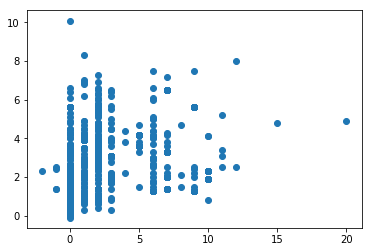

In [9]:
plt.scatter(y,y_predict);

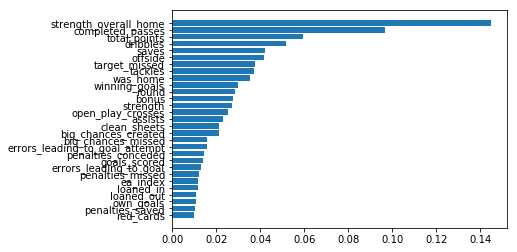

In [10]:
FPL_ml.plot_feature_importance(X,model)

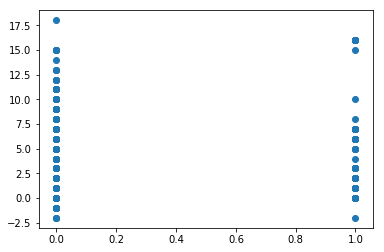

In [11]:
plt.scatter(X_train['yellow_cards'],y_train)

In [12]:
    from sklearn.preprocessing import OneHotEncoder
    # Team should be one-hot encoded for best results
    enc = OneHotEncoder()
    enc.fit(X['opponent_team'].values.reshape(-1,1))
    

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [13]:
enc.n_values_

array([21])

In [14]:
enc.feature_indices_

array([ 0, 21], dtype=int32)

In [15]:
X_teams = enc.transform(X['opponent_team'].values.reshape(-1,1)).toarray()

In [16]:
X_teams

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
team_df.columns

Index(['code', 'current_event_fixture', 'draw', 'form', 'id', 'link_url',
       'loss', 'name', 'next_event_fixture', 'played', 'points', 'position',
       'short_name', 'strength', 'strength_attack_away',
       'strength_attack_home', 'strength_defence_away',
       'strength_defence_home', 'strength_overall_away',
       'strength_overall_home', 'team_division', 'unavailable', 'win'],
      dtype='object')

In [18]:
team_df

,code,current_event_fixture,draw,form,id,link_url,loss,name,next_event_fixture,played,...,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,team_division,unavailable,win
0,3,"[{'is_home': False, 'day': 10, 'event_day': 1,...",0,None,1,,0,Arsenal,"[{'is_home': True, 'day': 1, 'event_day': 3, '...",0,...,4,1280,1270,1310,1270,1320,1260,1,False,0
1,91,"[{'is_home': False, 'day': 11, 'event_day': 2,...",0,None,2,,0,Bournemouth,"[{'is_home': True, 'day': 24, 'event_day': 1, ...",0,...,3,1040,1040,1080,1040,1120,1090,1,False,0
2,36,"[{'is_home': False, 'day': 10, 'event_day': 1,...",0,None,3,,0,Brighton,"[{'is_home': True, 'day': 24, 'event_day': 1, ...",0,...,2,1060,1040,1050,990,1080,1030,1,False,0
3,90,"[{'is_home': False, 'day': 10, 'event_day': 1,...",0,None,4,,0,Burnley,"[{'is_home': True, 'day': 24, 'event_day': 1, ...",0,...,3,1210,1170,1030,1030,1130,1100,1,False,0
4,8,"[{'is_home': True, 'day': 12, 'event_day': 3, ...",0,None,5,,0,Chelsea,"[{'is_home': False, 'day': 25, 'event_day': 2,...",0,...,4,1340,1310,1300,1290,1310,1260,1,False,0
5,31,"[{'is_home': False, 'day': 10, 'event_day': 1,...",0,None,6,,0,Crystal Palace,"[{'is_home': True, 'day': 25, 'event_day': 2, ...",0,...,3,1110,1100,1130,1080,1110,1080,1,False,0
6,11,"[{'is_home': True, 'day': 10, 'event_day': 1, ...",0,None,7,,0,Everton,"[{'is_home': False, 'day': 24, 'event_day': 1,...",0,...,3,1230,1080,1160,1050,1160,1070,1,False,0
7,38,"[{'is_home': True, 'day': 11, 'event_day': 2, ...",0,None,8,,0,Huddersfield,"[{'is_home': False, 'day': 24, 'event_day': 1,...",0,...,2,1050,1040,1030,1020,1050,1030,1,False,0
8,13,"[{'is_home': False, 'day': 10, 'event_day': 1,...",0,None,9,,0,Leicester,"[{'is_home': True, 'day': 24, 'event_day': 1, ...",0,...,3,1200,1120,1180,1140,1200,1140,1,False,0
9,14,"[{'is_home': False, 'day': 11, 'event_day': 2,...",0,None,10,,0,Liverpool,"[{'is_home': True, 'day': 24, 'event_day': 1, ...",0,...,5,1330,1270,1320,1310,1330,1320,1,False,0


In [19]:
next_game_df

,code,deadline_time,deadline_time_formatted,event,event_day,finished,finished_provisional,id,kickoff_time,kickoff_time_formatted,minutes,provisional_start_time,started,stats,team_a,team_a_score,team_h,team_h_score
0,919168,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,276,2018-02-24T12:30:00Z,24 Feb 12:30,0,False,False,[],15,None,9,None
1,919163,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,272,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],13,None,2,None
2,919165,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,273,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],16,None,3,None
3,919166,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,274,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],14,None,4,None
4,919169,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,277,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],20,None,10,None
5,919172,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,280,2018-02-24T15:00:00Z,24 Feb 15:00,0,False,False,[],8,None,19,None
6,919171,2018-02-24T11:30:00Z,24 Feb 11:30,28,1,False,False,279,2018-02-24T17:30:00Z,24 Feb 17:30,0,False,False,[],7,None,18,None
7,919167,2018-02-24T11:30:00Z,24 Feb 11:30,28,2,False,False,275,2018-02-25T12:00:00Z,25 Feb 12:00,0,False,False,[],17,None,6,None
8,919170,2018-02-24T11:30:00Z,24 Feb 11:30,28,2,False,False,278,2018-02-25T14:05:00Z,25 Feb 14:05,0,False,False,[],5,None,12,None
9,919164,2018-02-24T11:30:00Z,24 Feb 11:30,28,3,False,False,271,2018-03-01T19:45:00Z,01 Mar 19:45,0,False,False,[],11,None,1,None


In [33]:
plyr_df[['team','team_code','id','first_name','second_name']]

,team,team_code,id,first_name,second_name
0,1,3,1,David,Ospina
1,1,3,2,Petr,Cech
2,1,3,3,Damian Emiliano,Martinez
3,1,3,4,Laurent,Koscielny
4,1,3,5,Per,Mertesacker
5,1,3,6,Gabriel Armando,de Abreu
6,1,3,7,Héctor,Bellerín
7,1,3,9,Carl,Jenkinson
8,1,3,10,Nacho,Monreal
9,1,3,11,Rob,Holding


In [29]:
plyr_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

In [34]:
plyr_df['news']

0                                                       
1                                                       
2                             Season-long loan to Getafe
3                                                       
4                                                       
5                                Joined Valencia on 18/8
6                                                       
7                         Season-long loan to Birmingham
8                                                       
9                                                       
10                                                      
11                                                      
12                       Illness - 75% chance of playing
13                 Achilles injury - Unknown return date
14                  Groin Injury - 50% chance of playing
15                               Transferred to Valencia
16                                                      
17                             